<table>
    <tr>
        <td>
            <img src="extra/logo_aari.png" width="150" height="200" />
        </td>
        <td>
        <img src="extra/nansen_logo.png" width="150" height="150" />
        </td>
        <td>
            <center>
                <font size = 1>
                19 ЯНВАРЯ 2018, САНКТ-ПЕТЕРБУРГ, ААНИИ<br>
                <br>
                </font>
                <font size = 3>
                Материалы к мастер-классу<br> <b>Программирование тематических алгоритмов обработки ДДЗЗ</b><br><br>
                </font>
                <font size = 2>
                <b>Эдуард Казаков</b><br>
                Международный центр по окружающей среде и дистанционному зондированию им. Нансена
                </font>
            </center>
        </td>
    </tr>
</table>

<center>
<b>Часть 1. Открытие и обзор данных</b>
</center>

In [1]:
# импортируем программные библиотеки, которые помогут нам работать со спутниковыми данными

# Основное средство - GDAL. Основной компонент работы с растровыми геоданными, который вообще везде
from osgeo import gdal

# matplotlib - самая большая и мощная библиотека визуализации данных в Python
import matplotlib.pyplot as plt
import matplotlib as mpl

# numpy - одна из главных математических библиотек Python. Быстрые вычисления матриц (а снимки это матрицы)
import numpy as np

# Некоторые служебные команды. Так мы сможем смотреть на изображения прямо в jupyter notebook
from IPython.display import Image

# Настроим размер картинок, которые будет показывать jupyter notebook
mpl.rcParams['figure.figsize'] = (10,10)

Самый простой способ открыть и посмотреть данные - сделать это с помощью GDAL

In [2]:
dataset1 = gdal.Open('git_data/LC08_L1TP_174029_20170512_20170525_01_T1_B1_B11_cut.TIF')

Выполнив эту команду, мы записали в переменную с именем dataset1 набор данных в указаном GeoTIFF файле. Это 11 канальное изображение - сшитый в один файл и обрезанный по небольшой границе набор данных Landsat 8 с портала earthexplorer.usgs.gov

Теперь можно задавать вопросы этой переменной

In [3]:
# Сколько столбцов
dataset1.RasterXSize

537

In [4]:
# Сколько строк
dataset1.RasterYSize

586

In [6]:
# Сколько каналов
dataset1.RasterCount

11

In [7]:
# Информация о системе координат
dataset1.GetProjection()

'PROJCS["WGS 84 / UTM zone 37N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",39],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32637"]]'

Из чего состоит набор данных?

In [8]:
# Матрица чисел, записанных в первом канале
dataset1.GetRasterBand(1).ReadAsArray()

array([[10191, 10182, 10070, ..., 10341, 10335, 10462],
       [10040, 10082, 10146, ..., 10359, 10358, 10538],
       [ 9843,  9853,  9828, ..., 10350, 10229, 10467],
       ..., 
       [10082, 10187, 10206, ..., 10474, 10507, 10504],
       [10140, 10090, 10244, ..., 10480, 10512, 10525],
       [10017,  9874, 10114, ..., 10505, 10511, 10533]], dtype=uint16)

In [9]:
# Можем обратиться к любому пикселю
dataset1.GetRasterBand(1).ReadAsArray()[100][100]

9751

Первое, что хочется сделать со снимком - посмотреть на него, правильно?

Возьмём данные трех каналов как матрицы в три переменные

In [10]:
dataset1_band2 = dataset1.GetRasterBand(2).ReadAsArray()
dataset1_band3 = dataset1.GetRasterBand(3).ReadAsArray()
dataset1_band4 = dataset1.GetRasterBand(4).ReadAsArray()

Нарисуем отдельный канал со всеми настройками по умолчанию

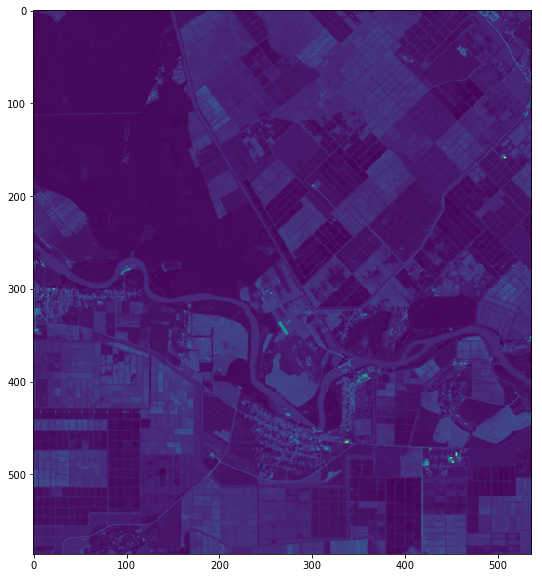

In [11]:
plt.imshow(dataset1_band2)
plt.show()

Это одноканальное изображение, очевидно раскрашенное в какую-то цветовую палитру-градиент. Мы можем управлять этим, а также задавать границы min/max

https://matplotlib.org/examples/color/colormaps_reference.html

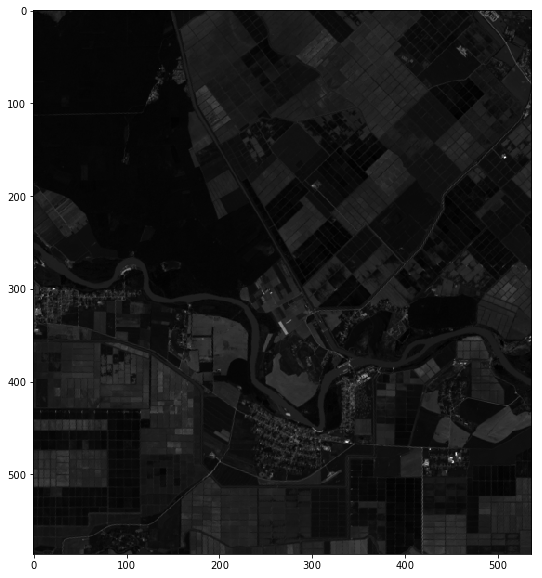

In [12]:
plt.imshow(dataset1_band2,cmap='gray')
plt.show()

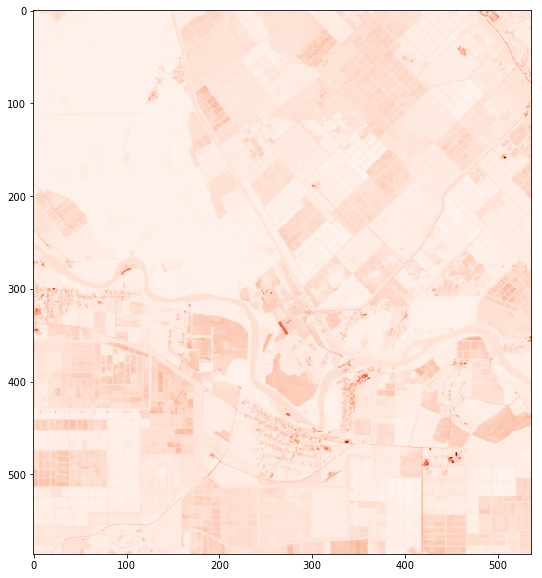

In [13]:
plt.imshow(dataset1_band2,cmap='Reds')
plt.show()

Мы знаем, что у нас много каналов и 2, 3 и 4 соответстуют отраженному сигналу в синем, зелёном и красном диапазонах длин волн соответственно. Можно ли сделать композит в естественных цветах? Конечно!

In [14]:
print dataset1_band2[0][0]
print dataset1_band3[0][0]
print dataset1_band4[0][0]

9197
8695
7670


In [15]:
# Для начала соберем RGB матрицу. Это делается одной командой!
dataset1_4_3_2 = np.dstack([dataset1_band4,dataset1_band3,dataset1_band2])
dataset1_4_3_2

array([[[7670, 8695, 9197],
        [7534, 8674, 9224],
        [7344, 8723, 9219],
        ..., 
        [8264, 8455, 9428],
        [8141, 8768, 9411],
        [8200, 9163, 9595]],

       [[7305, 8733, 9184],
        [7445, 8771, 9178],
        [7682, 8873, 9198],
        ..., 
        [8215, 8405, 9416],
        [8166, 8789, 9393],
        [8661, 9447, 9706]],

       [[6872, 8419, 8728],
        [6988, 8598, 8810],
        [6970, 8418, 8848],
        ..., 
        [8185, 8374, 9411],
        [7863, 8752, 9245],
        [8609, 9356, 9686]],

       ..., 
       [[7421, 8671, 9180],
        [7725, 8728, 9351],
        [7839, 8858, 9396],
        ..., 
        [8566, 8643, 9572],
        [8554, 8639, 9609],
        [8631, 8662, 9607]],

       [[7492, 8680, 9172],
        [7380, 8703, 9084],
        [7919, 8835, 9210],
        ..., 
        [8582, 8646, 9580],
        [8634, 8673, 9619],
        [8672, 8680, 9626]],

       [[7193, 8283, 8934],
        [7051, 8027, 8910],
        [74

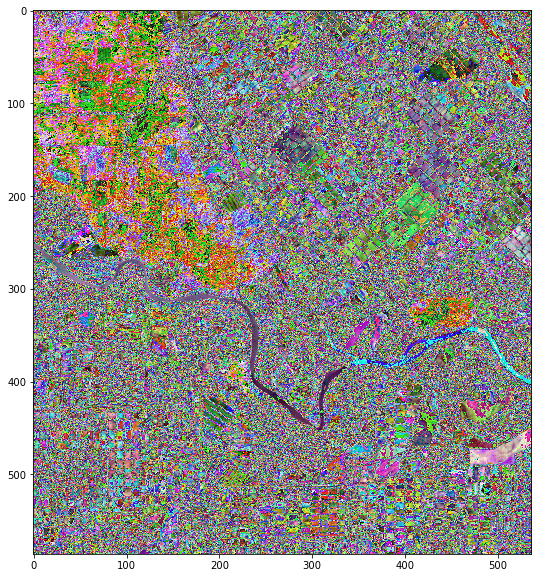

In [16]:
plt.imshow(dataset1_4_3_2)
plt.show()

Что-то пошло не так :) Визуализация при границах по умолчанию не впечатляет (так как уровни сигнала разные). Нужно сначала нормализовать данные, это вычисление тоже не проблема

In [17]:
# описываем функцию, которая будет нормализовать значения канала в диапазон от 0 до 1
def normalize(input_band):
    min_value, max_value = input_band.min()*1.0, input_band.max()*1.0
    return ((input_band*1.0 - min_value*1.0)/(max_value*1.0 - min_value))

# вызываем эту функцию для всех наших трёх каналов
dataset1_band2_normalized = normalize(dataset1_band2)
dataset1_band3_normalized = normalize(dataset1_band3)
dataset1_band4_normalized = normalize(dataset1_band4)

#посмотрим на какой-нибудь канал
dataset1_band2_normalized

array([[ 0.07723106,  0.08007586,  0.07954905, ...,  0.10156991,
         0.09977874,  0.11916553],
       [ 0.07586134,  0.07522916,  0.07733642, ...,  0.10030555,
         0.0978822 ,  0.13086082],
       [ 0.02781583,  0.03645559,  0.04045938, ...,  0.09977874,
         0.08228848,  0.12875356],
       ..., 
       [ 0.07543989,  0.09345696,  0.09819829, ...,  0.11674218,
         0.12064061,  0.12042988],
       [ 0.07459699,  0.06532504,  0.07860078, ...,  0.11758508,
         0.12169424,  0.12243178],
       [ 0.0495206 ,  0.04699189,  0.08702982, ...,  0.1209567 ,
         0.12390686,  0.12411759]])

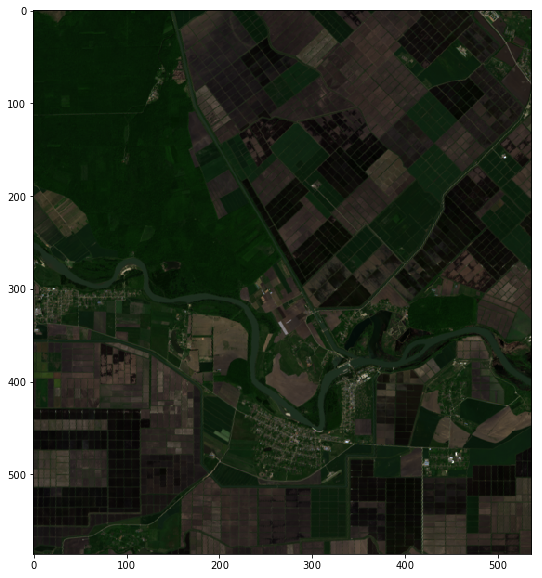

In [18]:
# собираем композит и рисуем его
dataset1_4_3_2_normalized = np.dstack([dataset1_band4_normalized,dataset1_band3_normalized,dataset1_band2_normalized])
plt.imshow(dataset1_4_3_2_normalized)
plt.show()

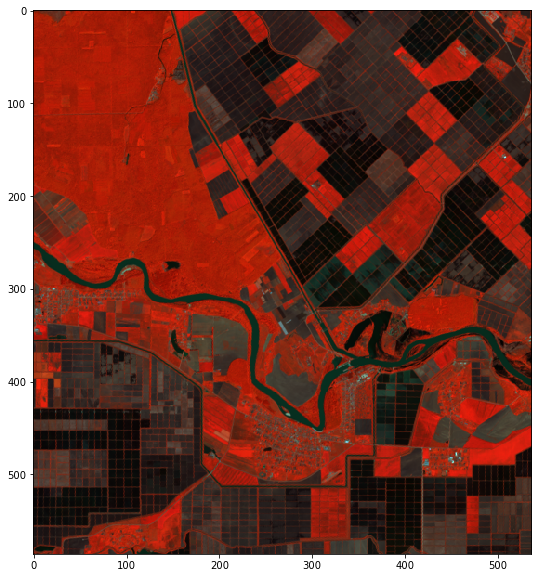

In [19]:
# Построим ещё классическую визуализацию в псевдо-цветах с ближним ИК
dataset1_band5 = dataset1.GetRasterBand(5).ReadAsArray()
dataset1_band5_normalized = normalize(dataset1_band5)

dataset1_5_3_2_normalized = np.dstack([dataset1_band5_normalized,dataset1_band3_normalized,dataset1_band2_normalized])
plt.imshow(dataset1_5_3_2_normalized)
plt.show()

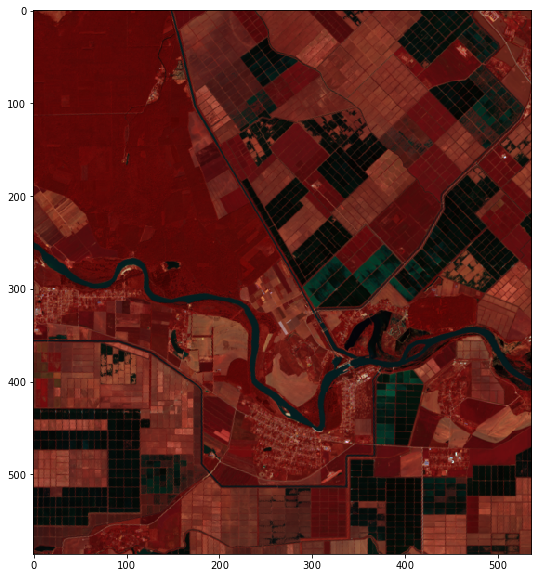

In [20]:
# И ещё одну... :)

dataset1_band6 = dataset1.GetRasterBand(6).ReadAsArray()
dataset1_band6_normalized = normalize(dataset1_band6)

dataset1_6_4_2_normalized = np.dstack([dataset1_band6_normalized,dataset1_band4_normalized,dataset1_band2_normalized])
plt.imshow(dataset1_6_4_2_normalized)
plt.show()

Теперь попробуем посмотреть на них рядом - расположить интересные нам картинки вместе и сравнивать

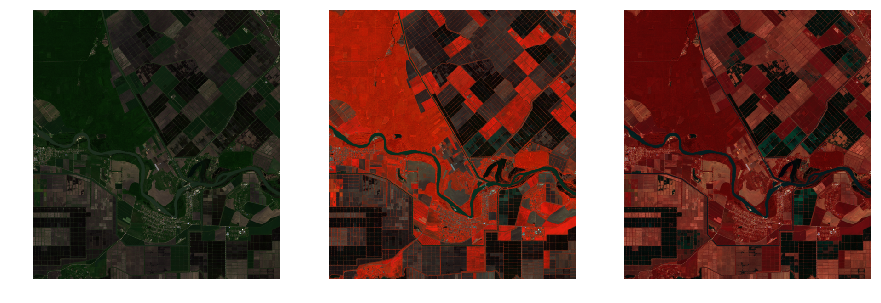

In [21]:
# Заодно уберем рамки и нарисуем покрупнее

mpl.rcParams['figure.figsize'] = (15,15)

plt.subplot(231)
plt.imshow(dataset1_4_3_2_normalized)
plt.axis('off')

plt.subplot(232)
plt.imshow(dataset1_5_3_2_normalized)
plt.axis('off')

plt.subplot(233)
plt.imshow(dataset1_6_4_2_normalized)
plt.axis('off')


plt.show()

mpl.rcParams['figure.figsize'] = (10,10)

В любой момент можно брать любые фрагменты изображений

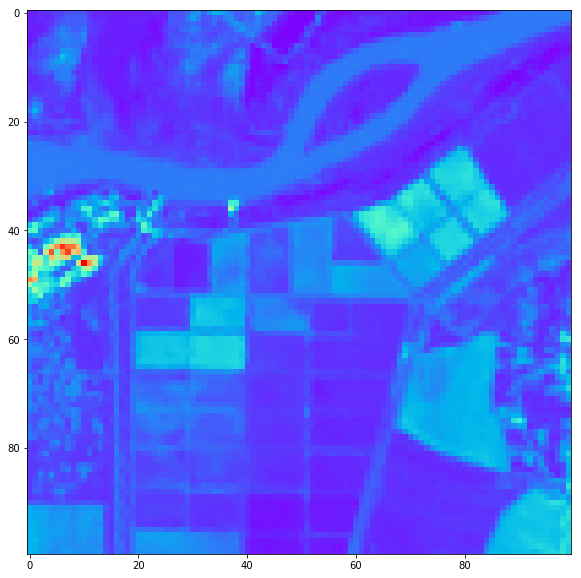

In [22]:
plt.imshow(dataset1_band2[350:450,350:450],cmap='rainbow')
plt.show()

Срезами любых конфигураций

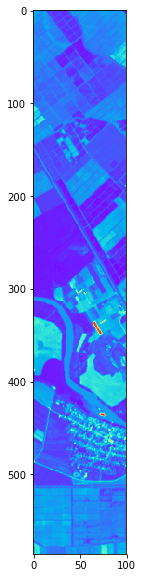

In [23]:
plt.imshow(dataset1_band2[:,200:300],cmap='rainbow')
plt.show()

Перепроецирования, интерполяции на различные сетки и другие операции выполняются очень просто над объектами GDAL

In [24]:
dataset1

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x05DB73E0> >

In [25]:
# Запускаем gdalwarp, gdal_translate и другие ключевые команды GDAL как функции Python!
# Спроецируем 2 канал в WGS84

dataset1_wgs = gdal.Warp('', dataset1, dstSRS='EPSG:4326',format='MEM')

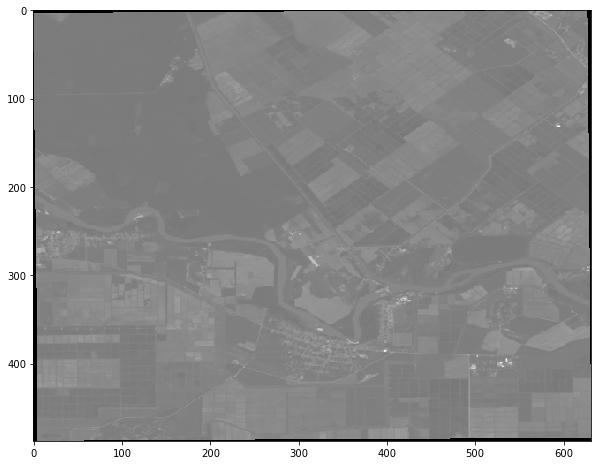

In [26]:
dataset1_wgs_band2 = dataset1_wgs.GetRasterBand(2).ReadAsArray()
plt.imshow(dataset1_wgs_band2,cmap='gray')
plt.show()

Уменьшим разрешение в 5 раз

In [27]:
dataset1_scaled = gdal.Warp('', dataset1, xRes=150, yRes=150,format='MEM')

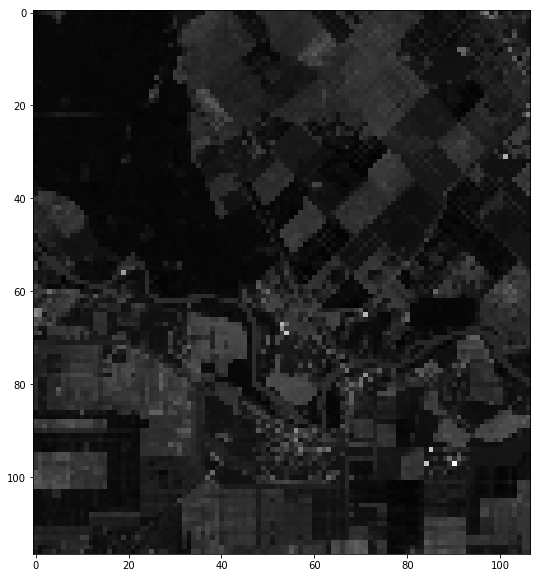

In [28]:
dataset1_scaled_band2 = dataset1_scaled.GetRasterBand(2).ReadAsArray()
plt.imshow(dataset1_scaled_band2,cmap='gray')
plt.show()